In [1]:
import numpy as np # numerical library
import scipy as sp # scientific library (statistics, least-square solver, etc)
import pandas as pd # simplifies handling with datasets, handling is similar to matlab or R
import matplotlib as mpl # plot library
import matplotlib.pyplot as plt # plot commands
import seaborn as sns # helper library for more advanced charts
from matplotlib import ticker

%matplotlib inline

In [2]:
def latexify(fig_width=None, fig_height=None, columns=1, scale=1.0, despine=False):
    from math import sqrt
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.
    
    :info: Functions sets arbitrary *sane* defaults for plotting figures.
    What most users would needs the column parameter, which will output figures
    suitable for {1, 2}-column research papers.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}, how many columns it covers
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])
    
    #width  = 3.487
    #height = width / 1.618

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5) - 1.0) / 2.0    # Aesthetic ratio
        fig_height = fig_width * golden_mean # height in inches
        
    # If we decide to scale figure for presentation or something
    fig_height *= scale
    fig_width *= scale

    MAX_HEIGHT_INCHES = 16.0 * scale
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {
        # Use LaTex to write all text
        'text.usetex': True,
        'font.family': 'serif',
        #'font.serif': 'Times',
        # Use 10pt font in plots, to match 10pt font in document
        #'axes.labelsize': 10,
        #'font.size': 10,
        # Make the legend/label fonts a little smaller
        #'legend.fontsize': 8,
        #'xtick.labelsize': 8,
        #'ytick.labelsize': 8,
        
        'axes.spines.right': not despine,
        'axes.spines.top': not despine,
        
        'axes.linewidth': 0.8,
        'axes.edgecolor': '0.8',
        
        
        
        'figure.autolayout': True,
        'figure.figsize': [fig_width, fig_height],
        
        'savefig.format': 'pdf',
        'savefig.bbox': 'tight',
        
        'pdf.fonttype': 42,
        
        'legend.framealpha': 0.2,
        
        'grid.color': '0.8',
        'grid.linewidth': 0.8,
        'grid.linestyle': ':',
    }
    
    mpl.style.use('default')
    mpl.style.use(['seaborn-notebook', 'seaborn-whitegrid', 'seaborn-ticks'])
    mpl.rcParams.update(params)

In [3]:
df = pd.read_csv('./iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


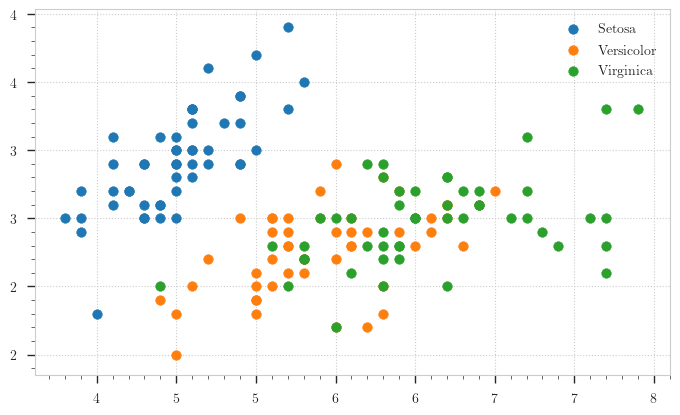

In [4]:
latexify(columns=2)
f, ax = plt.subplots()

for variety in df.variety.unique():
    ax.scatter(x='sepal.length', y='sepal.width', data=df[df.variety==variety], label=variety)

ax.grid()
ax.legend()

# Specify ticks
ax.xaxis.set_major_locator(ticker.MultipleLocator(.5))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(.1))

ax.yaxis.set_major_locator(ticker.MultipleLocator(.5))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(.1))

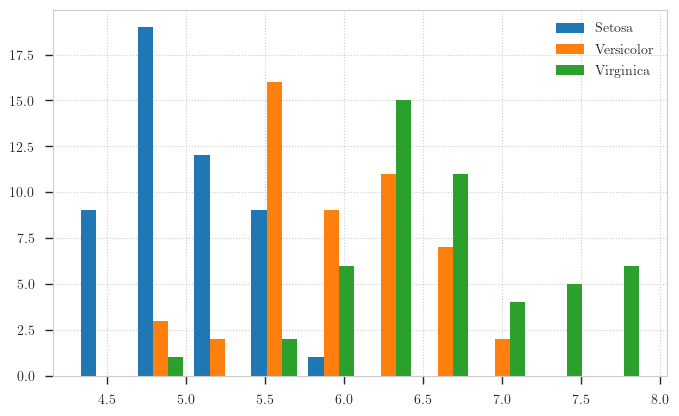

In [5]:
latexify(columns=2)
f, ax = plt.subplots()

data = [df.loc[df.variety==variety, 'sepal.length'] for variety in df.variety.unique() ]

#for variety in df.variety.unique():
ax.hist(data, label=df.variety.unique(), histtype='bar')

ax.grid()
ax.legend()

# Specify ticks
#ax.xaxis.set_major_locator(ticker.MultipleLocator(.5))
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(.1))

#ax.yaxis.set_major_locator(ticker.MultipleLocator(.5))
#ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(.1))